In [12]:
# import modules 
from pycbc.waveform import get_waveform_filter_length_in_time as duration

import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform.generator import FDomainDetFrameGenerator, FDomainCBCGenerator

In [55]:
duration(approximant='IMRPhenomD', mass1=7.409, mass2=1.35, f_lower=20)

array(50.27989439)

In [38]:
inject_params = {'m1_det': 7.409,  #detector frame mass_1, taken from MAP values of (mass_1) GW200115 posterior samples
                 'm2_det': 1.351,  #detector frame mass_2,taken from MAP values (mass_2) of GW200115 posterior samples 
                 'spin_1z': -0.0034, #spin_1z, taken from MAP values (spin_1z) of GW200115 posterior samples
                 'spin_2z': -0.0002, #spin_2z, taken from MAP values (spin_1z) of GW200115 posterior samples
                 'luminosity_distance': 269,   #taken from MAP values (luminosity_distance) of GW200115 posterior samples
                 'iota': 0.606,       # taken from MAP value (iota) of GW200115 posterior samples
                 'ra': 0.721,         # taken from MAP value (ra) of GW200115 posterior samples
                 'dec': -0.021,       # taken from MAP value (dec) of GW200115 posterior samples
                 'pol':0,             # taken from MAP value (psi) of GW200115 posterior samples
                 'tc': 1263097773}   # tc is taken such that it is 4 secs before end_time for L1 noise


In [39]:
inj_approx = 'IMRPhenomD'

#-- injection_params array --

inj_params = np.array([inject_params['m1_det'], inject_params['m2_det'],\
                       inject_params['spin_1z'], inject_params['spin_2z'],\
                       inject_params['iota'], inject_params['luminosity_distance'],\
                       inject_params['ra'], inject_params['dec'],\
                       inject_params['pol'], inject_params['tc']])


fLow, fHigh = 20, 1600

low_frequency_cutoff, high_frequency_cutoff = 20, 1600   #(need to remove to optimize the code)

sampling_frequency = 2048       # Hz
segLen = 64                     # secs   (will also be used in start_up function)


In [62]:
ifos = ['L1', 'H1', 'V1']

static_params_gen = {'approximant': inj_approx, 'f_lower': fLow, 'mass1': inject_params['m1_det'],'mass2': inject_params['m2_det'],\
                     'spin1z': inject_params['spin_1z'], 'spin2z': inject_params['spin_2z'] , 'polarization': inject_params['pol'], 'inclination': inject_params['iota'], 'tc': inject_params['tc'],\
                     'distance': inject_params['luminosity_distance'], 'ra': inject_params['ra'],'dec': inject_params['dec']}

generator = FDomainDetFrameGenerator(FDomainCBCGenerator, epoch=static_params_gen['tc'] -55, detectors=ifos,\
                                     delta_f = 1/segLen, **static_params_gen) #(check)

signal = generator.generate() 

#-- data containers --

htilde = {}
data = {}

for ifo in ifos:  

    htilde[ifo] = signal[ifo]                      #-- Simulated Detector-Frame GW signal
   # htilde[ifo].resize(len(psd[ifo]))

   # data[ifo] = htilde[ifo] + noise_tilde[ifo]#

   # data

In [63]:
hp = htilde['L1'].to_timeseries()

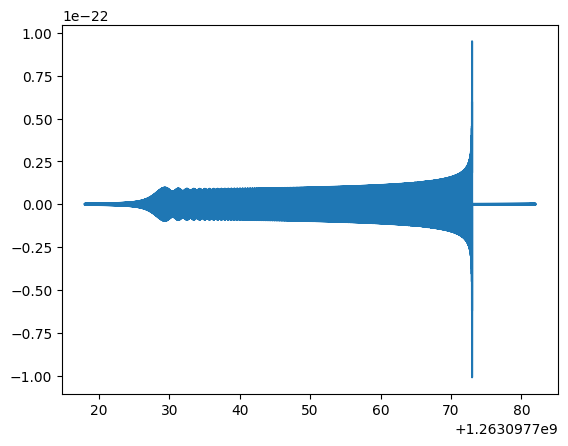

In [64]:
plt.plot(hp.sample_times, hp)

In [43]:
hp.data

array([7.32797143e-26, 6.98597680e-26, 6.64357099e-26, ...,
       8.35125440e-26, 8.01063252e-26, 7.66953336e-26])

In [49]:
idx = np.where(hp.sample_times >= static_params_gen['tc'])[0]
idx

array([ 868352,  868353,  868354, ..., 1048573, 1048574, 1048575])

In [53]:
hp[idx[15555]]

-4.985833703903581e-26